# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Data

In [1]:
import pandas as pd
Telecom_customer_churn=pd.read_csv("Telecom_customer_churn.csv",sep=",") #reading Telecom_customer_churn.csv file
Telecom_customer_churn.head() #Looking into top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
Telecom_customer_churn.shape

(7043, 21)

In [3]:
Telecom_customer_churn.dtypes #Checking the datatype of each attribute

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As per problem statement Target variable i.e. Churn is Object. so we'll use Classification to learn our model.

# Exploratory Data Analysis

# Handling Null Values

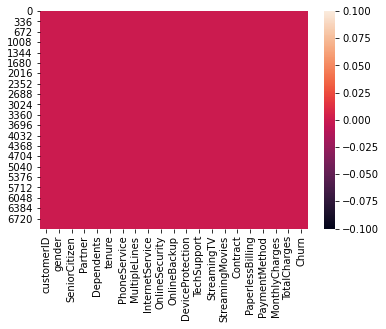

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Telecom_customer_churn.isnull()) #Looking for null values if any, in heatmap

We don't have any null value in TotalCharges, let's try to convert the TotalCharges to numberical value as it contains numbers:

In [5]:
Telecom_customer_churn['TotalCharges'] = pd.to_numeric(Telecom_customer_churn['TotalCharges'], errors='coerce')
#coerce will change all error values to Nan(Which is non numeric)

#lets check the null values now
Telecom_customer_churn['TotalCharges'].isnull().sum()

11

In [6]:
#We can see total charges column has some relationship with tenure and monthly charges i.e tenure * monthly charges + additional charges = total charge.
Telecom_customer_churn.loc[(pd.isnull(Telecom_customer_churn.TotalCharges)), 'TotalCharges'] = Telecom_customer_churn.tenure * Telecom_customer_churn.MonthlyCharges

In [7]:
Telecom_customer_churn['TotalCharges'].isnull().sum()

0

In [8]:
#We'll drop customerID becuase is unique and it's not gonna help us to predict anything
Telecom_customer_churn.drop('customerID', axis=1, inplace=True)

In [9]:
#Getting only object labels in Obj_label list
Obj_label=list(Telecom_customer_churn.select_dtypes(['object']).columns)

In [10]:
Obj_label

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


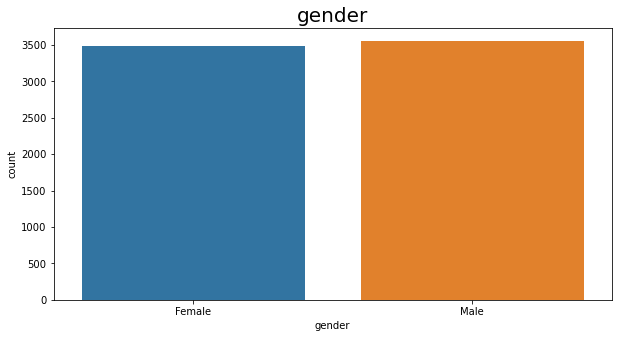

No     3641
Yes    3402
Name: Partner, dtype: int64


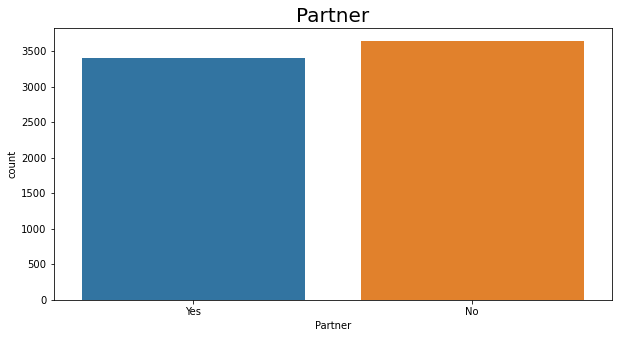

No     4933
Yes    2110
Name: Dependents, dtype: int64


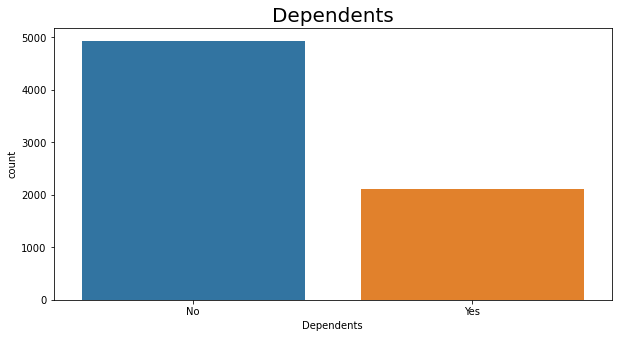

Yes    6361
No      682
Name: PhoneService, dtype: int64


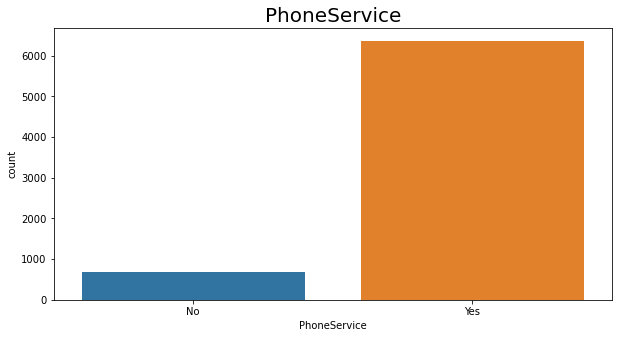

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


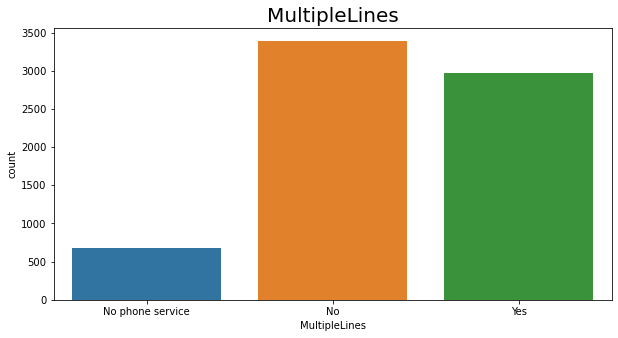

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


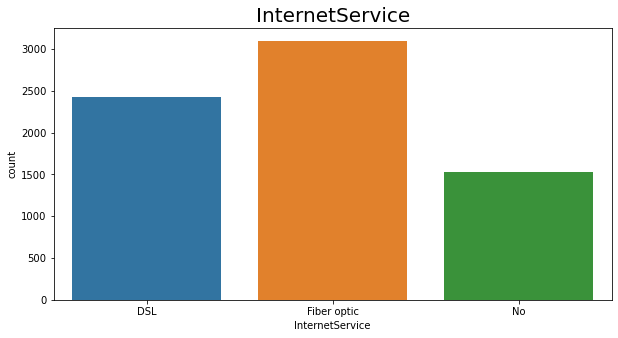

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


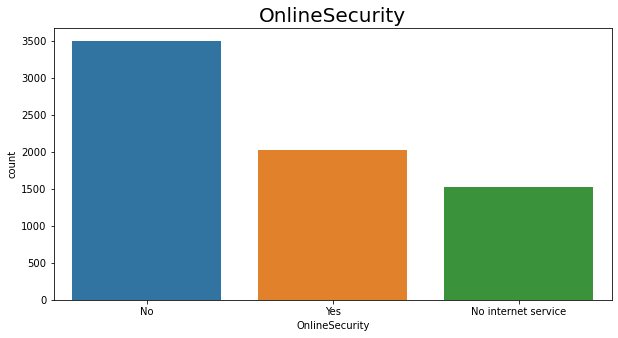

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


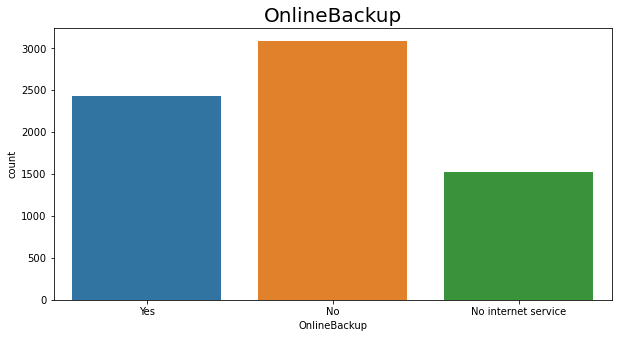

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


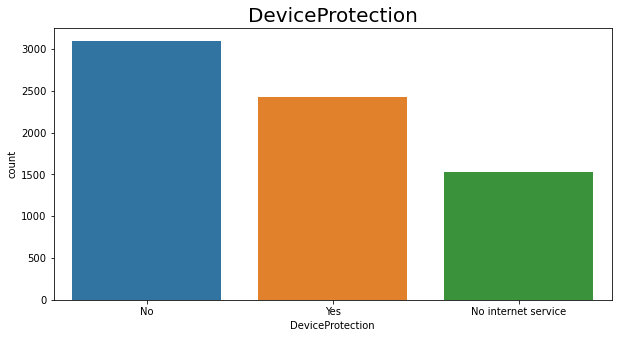

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


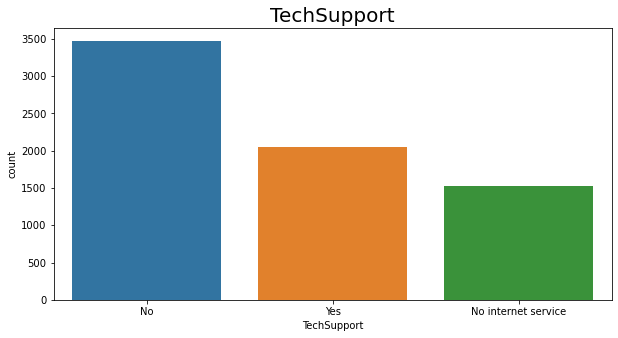

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


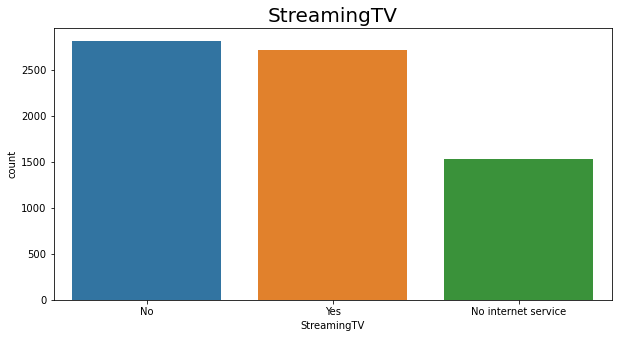

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


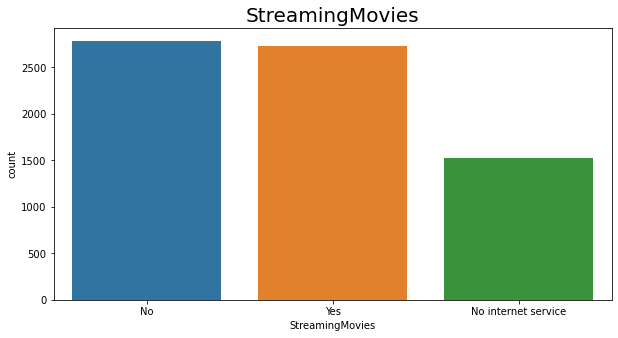

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


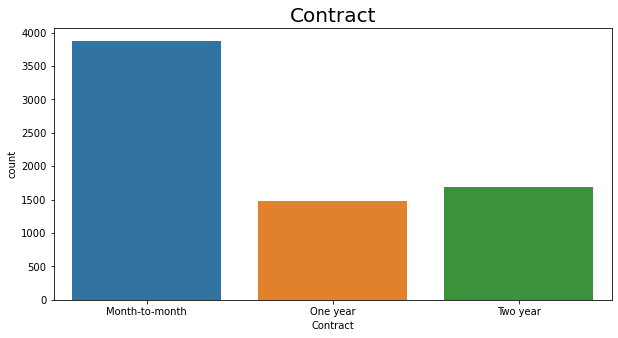

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


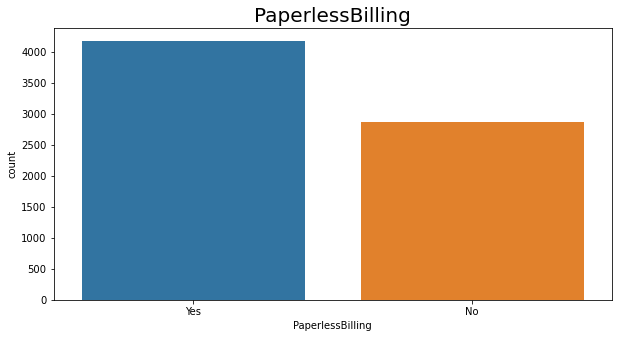

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


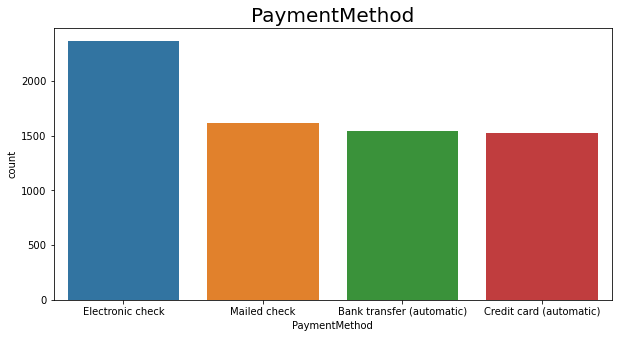

No     5174
Yes    1869
Name: Churn, dtype: int64


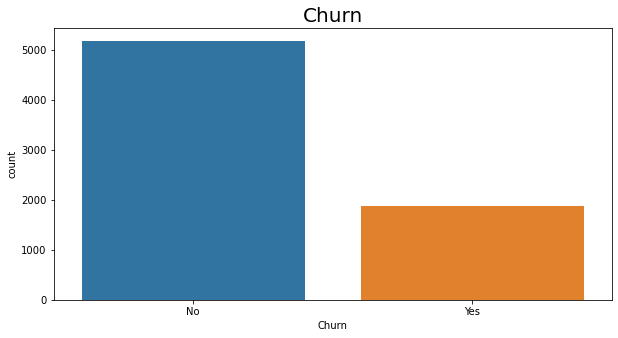

In [11]:
import matplotlib.pyplot as plt
for i in Obj_label:
    print(Telecom_customer_churn[i].value_counts())
    plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
    sns.countplot(x=Telecom_customer_churn[i]) #Plotting Countplot for all the object columns
    plt.title(i, fontsize = 20) #Setting up the title
    plt.show() #plotting the graph

1. We have 3555 male and 3488 female customers Almost same number. 
2. 3402 has partner and 3641 customers is not having any partner.
3. 4933 customers are with no dependents and 2110 are with dependents. 
4. 6361 customer use phone services and 682 customer don't use. 
5. Maximum customer does not have multiple lines(3390) where as 2971 customer has multiple line and 682 customers does not have phone service. 
6. 3096 customers are using Fiber optic and 2421 are using DSL, 1526 are not using internet service. 
7. 3498 customers does not have online security and 2019 customer have internet security, 1526 are not having internet service.
8. 3088 customers are not having any online back-up and 2429 has online backup and 1526 are not having internet services only. 
9. 3095 customer are not having device protection and 2422 have device protection, 1526 are not having internet services only. 
10. 3473 customer are not having technical support and 2044 have technical support, 1526 are not having internet services only. 
11. 2810 cutomer are not streaming TV and 2707 have streaming TV, 1526 are not having internet services only.
12. 2785 cutomer are not streaming Movies and 2732 have streaming Movies, 1526 are not having internet services only.
13. 3875 custoer are not have month-to-month contract and 1695 have two year contract and 1473 have one-year contract. 
14. Customer with paperless billing are 4171 and not paperless billing are 2872. 
15. Customer with electronic check payment mode are 2365, mailed check are 1612,  paying with bank transfer(automatic) 1544 customer and 1522 are doing payment with credit card (automatic). 
16. Churned customer are 1869 and 5174 are not churned.

## Bi-variate Analysis

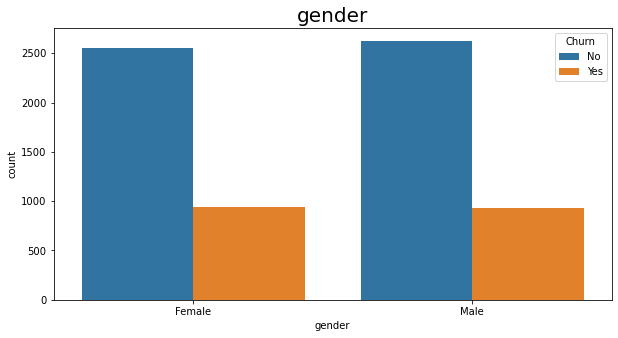

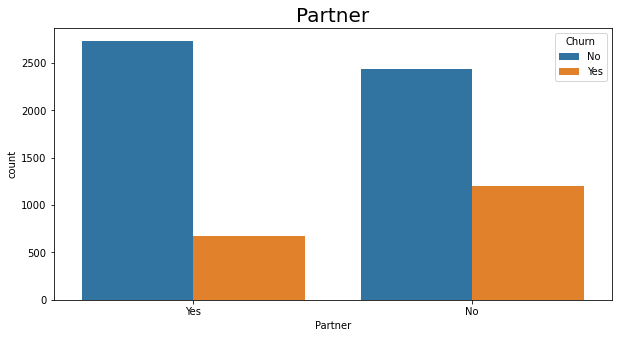

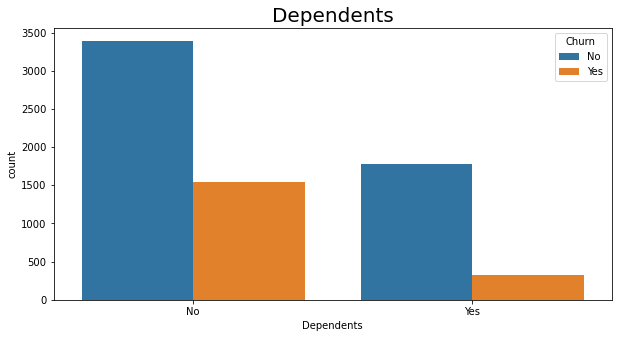

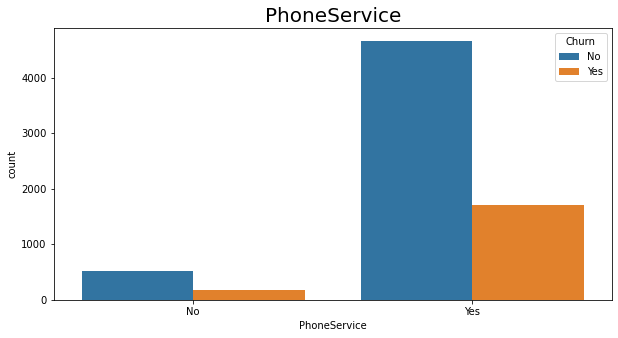

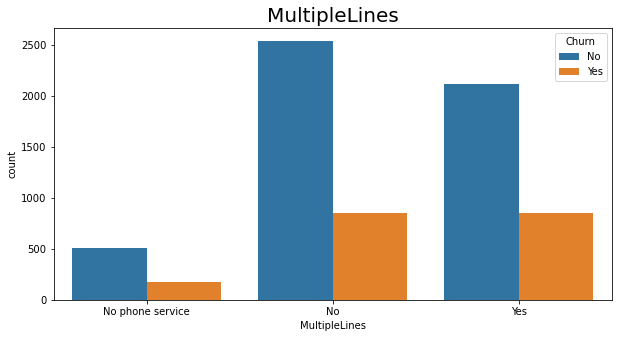

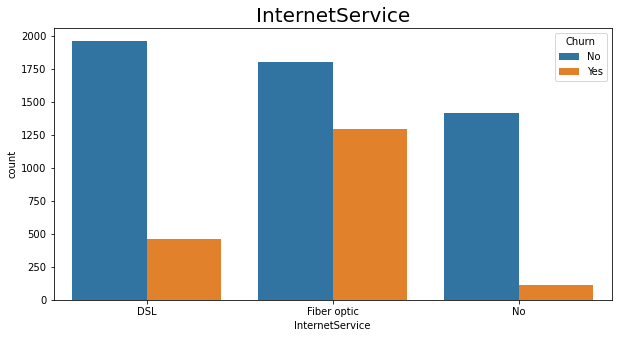

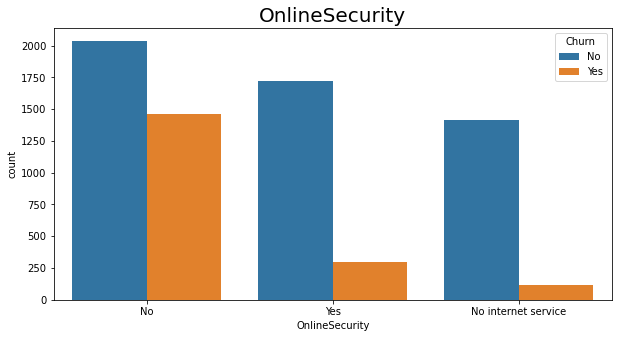

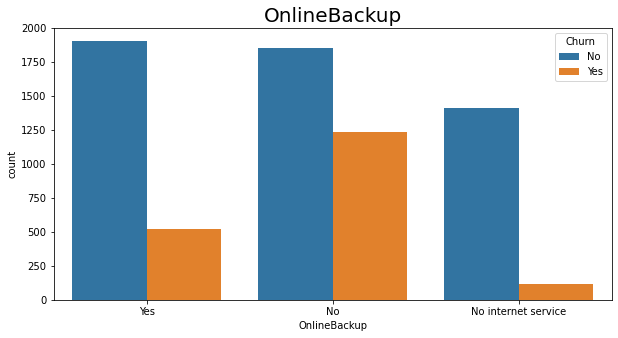

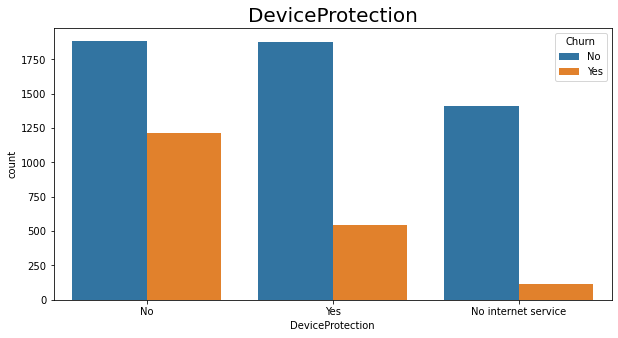

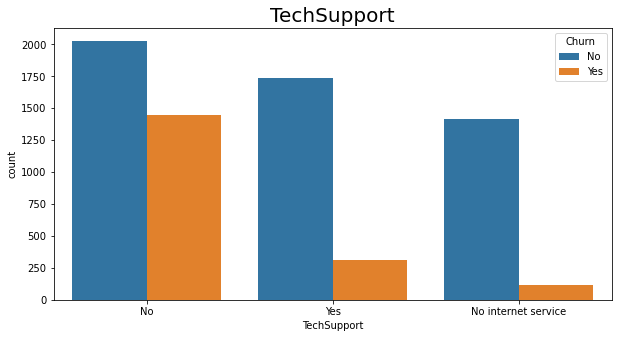

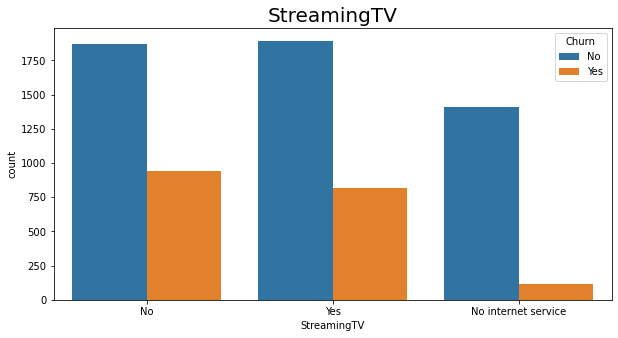

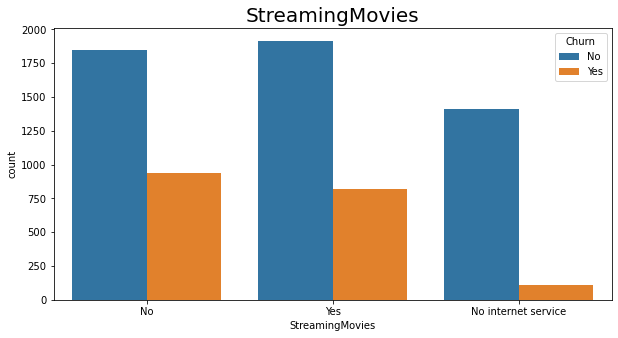

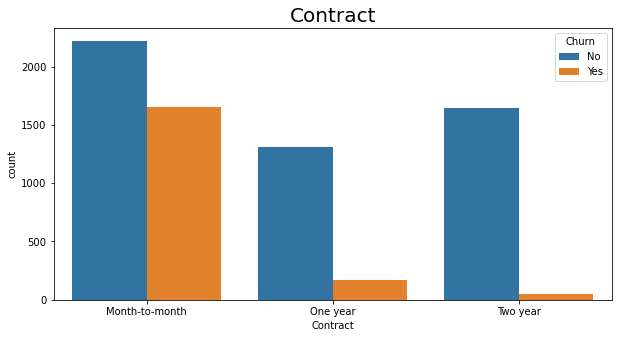

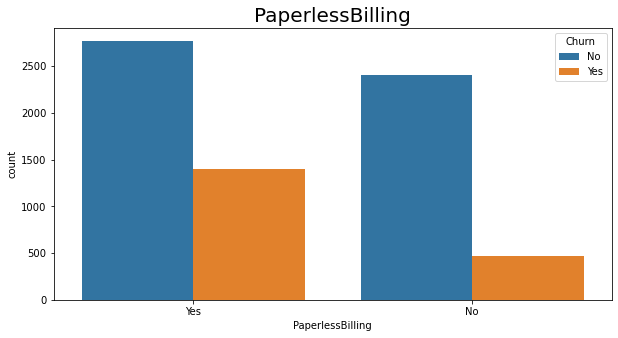

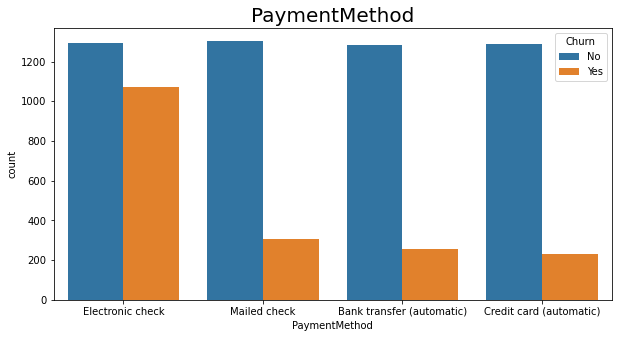

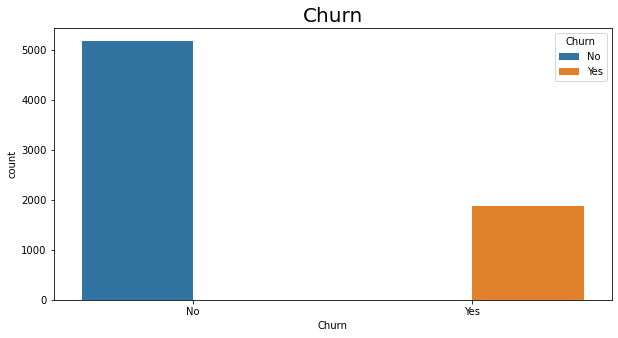

In [12]:
import matplotlib.pyplot as plt
for i in Obj_label:
    plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
    sns.countplot(x=Telecom_customer_churn[i],hue=Telecom_customer_churn['Churn']) #Plotting Countplot for object columns
    plt.title(i, fontsize = 20) #Setting up the title
    plt.show() #plotting the graph

1. Churned male and females are almost same. 
2. Customer who has partner are churned less than who does not have partner. 
3. Customer with no dependents are churned more than with dependents. 
4. Customer who has phone service are churned more. 
5. Customer does not have multiple lines and has multiple line are churned almost by same numbers. 
6. Customer with Fiber optic are churned more than DSL churned. 
7. Customer does not have online security are churned most. 
8. Customers are not having any online back-up are churned most. 
9. Customer who are not having device protection are churned most. 
10. Customer who does not has technical support aree churned more. 
11. Customer who are not streaming TV are churned more. 
12. Customer who are not streaming Movies are churned more. 
13. Customers with month-to-month contract are churned more. 
14. Customer with paperless billing are churned more. 
15. Customer with electronic check payment mode churned more. 
16. Churned Customers are less and Not Churned customer are less.

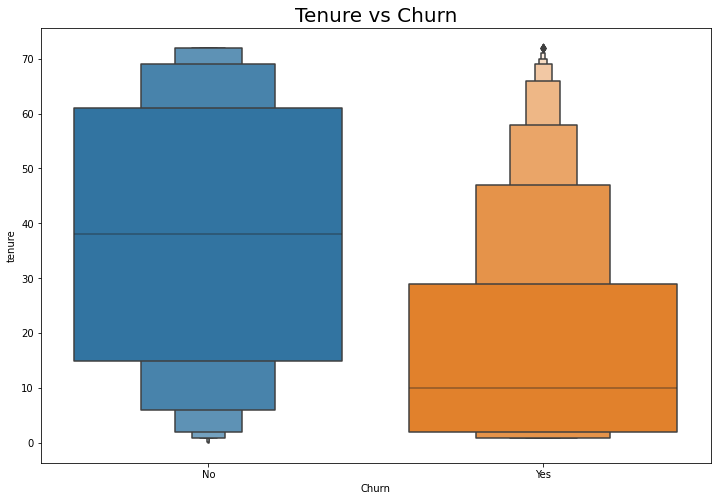

In [13]:
#Plotting boxenplot for Tenure and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['tenure'])
plt.title('Tenure vs Churn', fontsize = 20)
plt.show()

Churned density is more when Tensure is between 0-30.

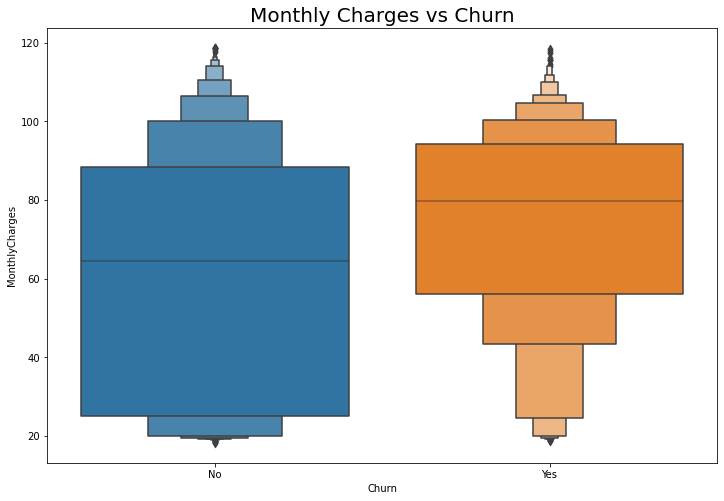

In [14]:
#Plotting boxenplot for MonthlyCharges and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['MonthlyCharges'])
plt.title('Monthly Charges vs Churn', fontsize = 20)
plt.show()

Churned Density is heigh when Monthly Charges is between 60-90.

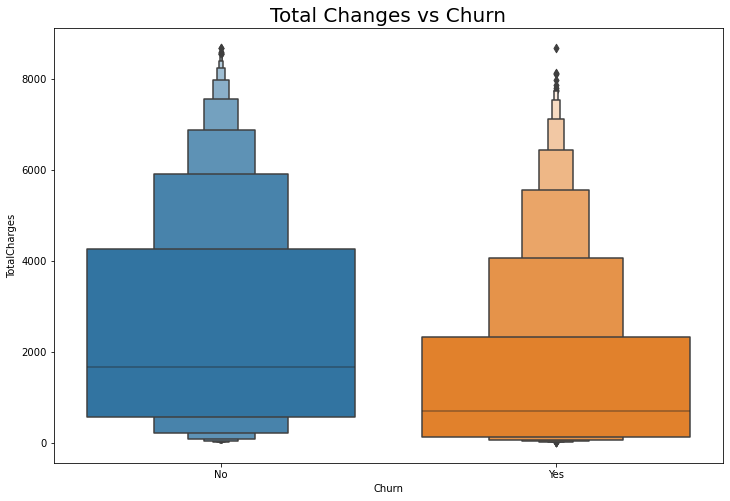

In [15]:
#Plotting boxenplot for TotalCharges and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['TotalCharges'])
plt.title('Total Changes vs Churn', fontsize = 20)
plt.show()

Churned density is high when Total charges is between 0-2200 approx.

# Label Encoding

In [16]:
#Label encoding for the object columns
label_list=list(Telecom_customer_churn.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    Telecom_customer_churn[i] = le.fit_transform(Telecom_customer_churn[i])

In [17]:
Telecom_customer_churn.head() #Looking into first 5 rows of data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Multi-Variate Analysis

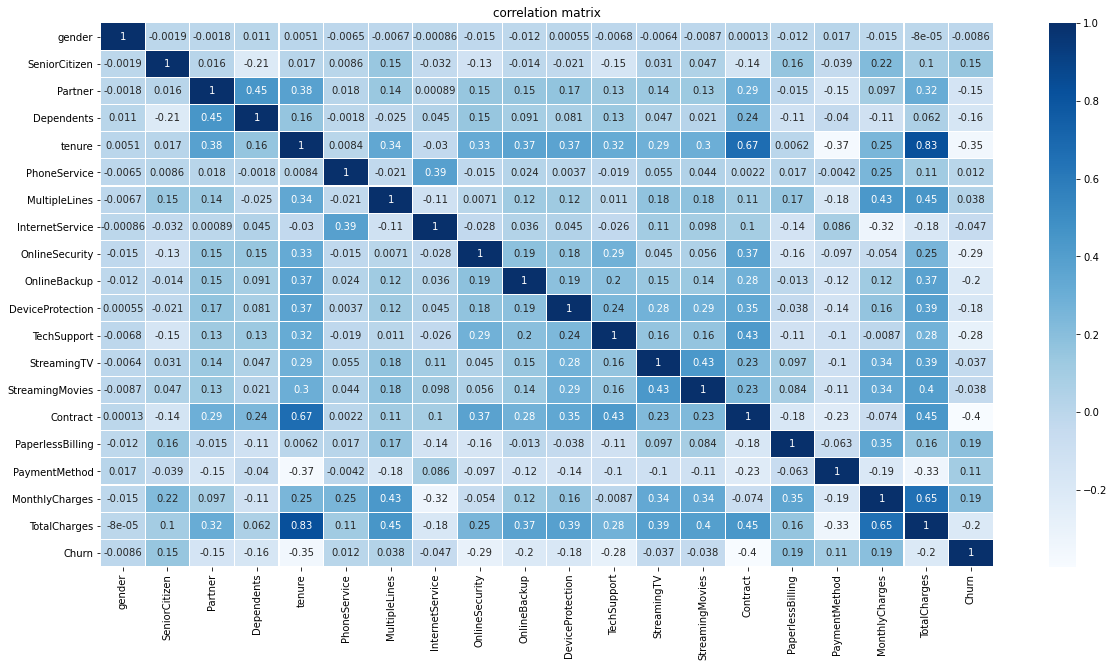

In [18]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Telecom_customer_churn.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Churn have high corelation with Tenure i.e. -35% and than with OnlineSecurity i.e. -29%

In [19]:
Telecom_customer_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Column like Monthly charges and Total Charges have extreme high values as compare with other columns, So we'll do scaling.
There is hue difference in mean median std of Total changes, so we need to remove the skewness as well.

In [20]:
#Checking the Correlation with Churn in sorted order
cor_mtx=Telecom_customer_churn.corr()
cor_mtx['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [21]:
#Corelation of Gender of too low i.e. negligible, So we are dropping it.
Telecom_customer_churn.drop('PhoneService', axis=1, inplace=True)

# Removing Skewness and Outliers

In [22]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Telecom_customer_churn))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


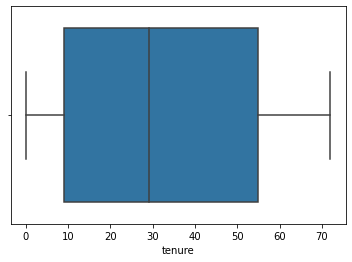

In [23]:
sns.boxplot(x=Telecom_customer_churn['tenure'])

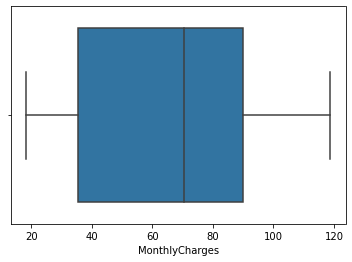

In [24]:
sns.boxplot(x=Telecom_customer_churn['MonthlyCharges'])

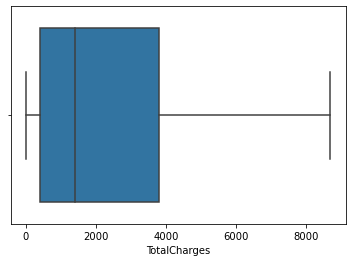

In [25]:
sns.boxplot(x=Telecom_customer_churn['TotalCharges'])

No outliers present in data.

In [26]:
Telecom_customer_churn['TotalCharges'].skew()

0.963234654832277

In [27]:
Telecom_customer_churn['MonthlyCharges'].skew()

-0.22052443394398033

In [28]:
Telecom_customer_churn['tenure'].skew()

0.2395397495619829

In [29]:
#Removing skewness of TotalCharges columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
Telecom_customer_churn['TotalCharges']=PT.fit_transform(Telecom_customer_churn['TotalCharges'].values.reshape(-1,1))

In [30]:
Telecom_customer_churn['TotalCharges'].skew()

-0.1461205173267185

Skewness is not present in data now.

# Seprate independent variable and target variable

In [31]:
x = Telecom_customer_churn.drop("Churn", axis=1)
y = Telecom_customer_churn["Churn"]

# Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.152113
1,1.0,0.0,0.0,0.0,0.472222,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.640684
2,1.0,0.0,0.0,0.0,0.027778,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.251799
3,1.0,0.0,0.0,0.0,0.625000,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.635673
4,0.0,0.0,0.0,0.0,0.027778,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.284170


# Finding Best Random State

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8192143871273071  on Random_state  129


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [35]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [36]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8192143871273071
[[1444  133]
 [ 249  287]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1577
           1       0.68      0.54      0.60       536

    accuracy                           0.82      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113

[0.80837473 0.80269695 0.79134138 0.81178977 0.80326705]
0.8034939754177689
Difference between Accuracy score and cross validation score is -  0.015720411709538196
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||

Random Forest Classifier model have heighest accuracy i.e. 80% with 79.12% cross validation score which is good and the difference is too less.

# Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':["gini", "entropy"],
            'splitter':["best", "random"],
            'random_state':range(0,20), 
            'min_samples_split':[1,2,3,4,5],
            'min_samples_leaf':[1,2,3,4,5],
            'min_impurity_decrease':[0.0,1.0,2.0],
            'min_weight_fraction_leaf':[0.0,1.0,2.0],
            'max_depth':[None],
            'max_leaf_nodes':[None],
            'class_weight':[None],
            'max_features':[None]}

clf = GridSearchCV(DecisionTreeClassifier(), parameters,cv=5)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'random'}

In [38]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [39]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.7704685281590156

In [40]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.7704685281590156
[[1365  212]
 [ 273  263]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1577
           1       0.55      0.49      0.52       536

    accuracy                           0.77      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.76      0.77      0.77      2113



Our model learnt almost 77%

# AUC ROC curve

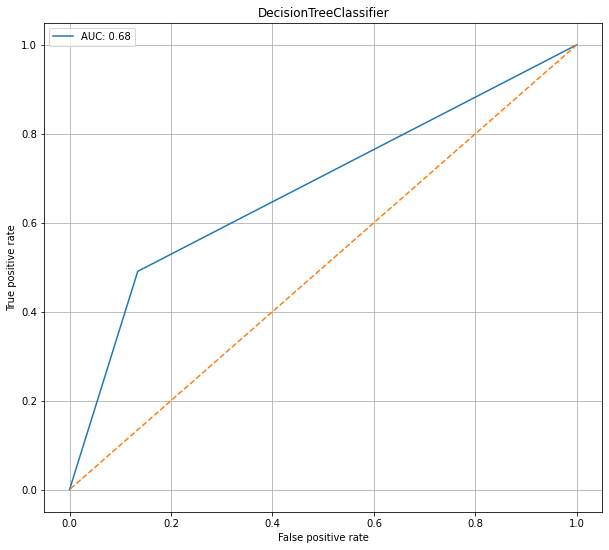

In [41]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving the model

In [42]:
import joblib
joblib.dump(clf.best_estimator_,"PJ9_Telecome_Customer_Churn.obj")
SVR_from_joblib=joblib.load("PJ9_Telecome_Customer_Churn.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021